# Hướng dẫn đặt tên file

#Tên file ipynb đặt theo format: 422001503001_2_1_21015941_NguyenDuyAn
* Lớp: 422001503001
* Ca 2 (1: sáng, 2: chiều)
* STT: 1
* MSSV: 21015941
* Họ tên: Nguyễn Duy An


# Hướng dẫn thực hành
### 1. Ghi đầy đủ thông tin sinh viên vào ô thông tin
### 2. Chạy thực nghiệm mô hình
* Sinh viên có 30 phút để tích hợp hàm eval_caption vào code mô hình của mình để xuất ra độ chính xác của mô hình. Sinh viên thao tác ở Cell "# Load mô hình đã train và tích hợp code (dùng cho Dữ liệu thử)".
* Sinh viên sử dụng dữ liệu thử test.zip tại mục "Dữ liệu thử" để thử xem code chắc chắn chạy được. Yêu cầu:
  - Dữ liệu thử chứa một ảnh và các câu chú thích trong tập tin .txt.
  - Dùng hàm eval_caption để tính và in độ chính xác giữa câu chú thích dự đoán từ mô hình so với từng câu chú thích trong tập tin .txt.
  - In độ chính xác cuối cùng là độ chính xác cao nhất.
* Sau 30 phút, dữ liệu thi sẽ mở tại mục "Dữ liệu thi cuối kỳ". Sinh viên thao tác ở Cell "# In kết quả (dùng cho Dữ liệu thi cuối kỳ)". Sinh viên có 10 phút để hoàn thành các thao tác sau:
  - Thay thế dữ liệu thi vào code.
  - Dùng hàm eval_caption dự đoán mô hình để in ra các độ chính xác (in độ chính xác cuối cùng là độ chính xác cao nhất).
  - Nộp ipynb vừa chạy xong với tên theo quy định theo phần hướng dẫn đặt tên file và nộp vào mục "Nộp mô hình cuối kỳ (Ca thi)".
  # Chú ý: mục "Nộp mô hình cuối kỳ" chỉ được mở trong vòng 10 phút.  
### 3. Trả lời phần "Câu hỏi" theo mẫu
* Sinh viên có 20 phút để hoàn thành, đặt tên theo quy định và nộp vào mục "Nộp báo cáo cuối kỳ (Ca thi)".
  # Chú ý: mục "Nộp báo cáo cuối kỳ" chỉ được mở trong vòng 20 phút.  


# Mô hình

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Code cho mô hình
# Tất cả code mô hình của sinh chuẩn bị (đã up lên LMS từ trước) được ở đây
# Sinh viên có thể tùy ý tạo thêm cell mới ở phần Mô hình

In [2]:
!pip install transformers peft accelerate


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 96.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 57.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 30.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 83.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [3]:
from transformers import AutoModelForVision2Seq, AutoProcessor
from peft import PeftModel
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_path = "/content/drive/MyDrive/Flickr8k/model_ImgC/caption"

# Load base model & processor
base_model = AutoModelForVision2Seq.from_pretrained(model_path).to(device)
processor = AutoProcessor.from_pretrained(model_path)

# Load adapter (nếu có)
model = PeftModel.from_pretrained(base_model, model_path)
model.eval()

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
/usr/local/lib/python3.11/dist-packages/peft/tuners/tuners_utils.py:167: UserWarning: Already found a `peft_config` attribute in the model. This will lead to having multiple adapters in the model. Make sure to know what you are doing!
  warnings.warn(


PeftModel(
  (base_model): LoraModel(
    (model): BlipForConditionalGeneration(
      (vision_model): BlipVisionModel(
        (embeddings): BlipVisionEmbeddings(
          (patch_embedding): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
        )
        (encoder): BlipEncoder(
          (layers): ModuleList(
            (0-11): 12 x BlipEncoderLayer(
              (self_attn): BlipAttention(
                (dropout): Dropout(p=0.0, inplace=False)
                (qkv): lora.Linear(
                  (base_layer): Linear(in_features=768, out_features=2304, bias=True)
                  (lora_dropout): ModuleDict(
                    (default): Dropout(p=0.05, inplace=False)
                  )
                  (lora_A): ModuleDict(
                    (default): Linear(in_features=768, out_features=16, bias=False)
                  )
                  (lora_B): ModuleDict(
                    (default): Linear(in_features=16, out_features=2304, bias=False)
                  

In [5]:
def load_captions_csv(file_path):
    captions = {}
    with open(file_path, 'r') as f:
        for line in f:
            if ',' in line:
                filename, caption = line.strip().split(",", 1)
                filename = filename.strip()
                # Bỏ qua dòng không phải ảnh
                if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
                    captions[filename] = caption.strip()
    return captions

# Tích hợp code

In [4]:
from transformers import AutoModelForVision2Seq, AutoProcessor
from peft import PeftModel
import torch
from PIL import Image
from sentence_transformers import SentenceTransformer, util

# Thiết bị sử dụng
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Đường dẫn đến mô hình đã fine-tuned và adapter
model_path = "/content/drive/MyDrive/Flickr8k/model_ImgC/caption"

# Load mô hình và processor
base_model = AutoModelForVision2Seq.from_pretrained(model_path).to(device)
processor = AutoProcessor.from_pretrained(model_path)
model = PeftModel.from_pretrained(base_model, model_path)
model.eval()

# Hàm sinh chú thích từ ảnh
def generate_caption(image_path):
    image = Image.open(image_path).convert("RGB")
    inputs = processor(images=image, return_tensors="pt").to(device)

    with torch.no_grad():
        generated_ids = model.generate(**inputs, max_new_tokens=50)

    caption = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
    return caption

# Hàm đánh giá độ tương đồng giữa hai câu
def eval_caption(sentence1, sentence2):
    embedder = SentenceTransformer('sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2')
    embeddings = embedder.encode([sentence1, sentence2], convert_to_tensor=True)
    similarity = util.pytorch_cos_sim(embeddings[0], embeddings[1])
    print(f"Similarity: {similarity.item():.4f}")
    return similarity.item()

# Ví dụ sử dụng
img_path = "/content/drive/MyDrive/Flickr8k/000000000724.jpg"

# Sinh chú thích cho ảnh
caption_generated = generate_caption(img_path)
print("Generated Caption:", caption_generated)

# So sánh với một câu chú thích tham chiếu
reference_caption = "An upside down stop sign by the road"
eval_caption(caption_generated, reference_caption)


Generated Caption: a jos sign on a street near trees


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.89k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/645 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/471M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Similarity: 0.5561


0.5560996532440186

In [7]:
# Hàm đánh giá

from sentence_transformers import SentenceTransformer, util

s1 = "Tôi thích ăn phở."
s2 = "Tôi yêu món phở."

def eval_caption(sentence1, sentence2):
    model = SentenceTransformer('sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2')
    # Encode sentences
    embeddings = model.encode([sentence1, sentence2], convert_to_tensor=True)
    # Compute cosine similarity
    similarity = util.pytorch_cos_sim(embeddings[0], embeddings[1])
    print(f"Similarity: {similarity.item():.4f}")

eval_caption(s1, s2)

Similarity: 0.5653



=== Image 1: 000000000724.jpg ===
Reference Caption: a stop sign installed upside down on a street corner

Generated Caption 1: a guy is written on a red sign near a street corner  → BLEU score: 75.76%

Generated Caption 2: a sign that says dj is on a red sign that says it says noob ⊆  → BLEU score: 52.22%

Generated Caption 3: a sign that says job!  → BLEU score: 22.57%

Generated Caption 4: a jos sign on a street corner  → BLEU score: 69.80%

Generated Caption 5: a jos sign on a street near trees  → BLEU score: 65.83%

Best Caption (1): a guy is written on a red sign near a street corner
Best BLEU score: 75.76%



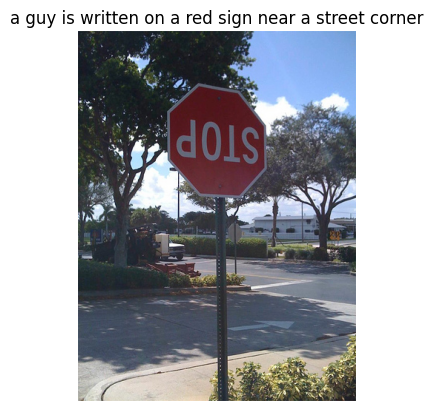


Average BLEU score across 1 image(s): 75.76%


In [10]:
# Load mô hình đã train và tích hợp code (dùng cho Dữ liệu thử)
# Sinh viên không được tạo thêm cells mới
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
from PIL import Image
import re
import os
import matplotlib.pyplot as plt
import torch

def visualize_image_with_caption(image_path, caption):
    image = Image.open(image_path).convert('RGB')
    plt.imshow(image)
    plt.title(caption)
    plt.axis('off')
    plt.show()

def generate_and_plot_captions_with_bleu_from_custom_images(model, processor, image_paths, captions_dict, device, num_images=5):
    model.eval()
    smoothie = SmoothingFunction().method7
    bleu_sum = 0

    with torch.no_grad():
        for i, image_path in enumerate(image_paths[:num_images]):
            if not os.path.exists(image_path):
                print(f"Image file {image_path} does not exist.")
                continue

            print(f"\n=== Image {i+1}: {os.path.basename(image_path)} ===")
            image = Image.open(image_path).convert('RGB')
            pixel_values = processor(images=image, return_tensors="pt").pixel_values.to(device)

            output = model.generate(
                pixel_values=pixel_values,
                max_new_tokens=64,
                num_return_sequences=5,
                do_sample=True,
                top_k=50,
                top_p=0.95
            )

            captions = processor.batch_decode(output, skip_special_tokens=True)
            # Clean caption: remove [unused...] tokens
            captions = [re.sub(r"\[unused\d+\]", "", caption).strip() for caption in captions]

            ref_caption = captions_dict.get(os.path.basename(image_path), "").lower()
            ref_tokens = ref_caption.split() if ref_caption else []

            best_bleu = 0
            best_caption = ""
            best_idx = -1

            print(f"Reference Caption: {ref_caption}\n")

            for idx, gen_caption in enumerate(captions):
                gen_tokens = gen_caption.lower().split()
                bleu = sentence_bleu([ref_tokens], gen_tokens, weights=(1, 0, 0, 0), smoothing_function=smoothie)

                print(f"Generated Caption {idx+1}: {gen_caption}  → BLEU score: {bleu * 100:.2f}%\n")
                #print(f"")

                if bleu > best_bleu:
                    best_bleu = bleu
                    best_caption = gen_caption
                    best_idx = idx

            print(f"Best Caption ({best_idx+1}): {best_caption}")
            print(f"Best BLEU score: {best_bleu * 100:.2f}%\n")

            bleu_sum += best_bleu
            visualize_image_with_caption(image_path, best_caption)

    avg_bleu = bleu_sum / num_images
    print(f"\nAverage BLEU score across {num_images} image(s): {avg_bleu * 100:.2f}%")

# Tải ảnh test và chú thích đặt ra
custom_image_paths = [
    "/content/drive/MyDrive/Flickr8k/000000000724.jpg",
]

custom_captions_dict = {
    "000000000724.jpg": "A stop sign installed upside down on a street corner",
}

generate_and_plot_captions_with_bleu_from_custom_images(
    model=model,
    processor=processor,
    image_paths=custom_image_paths,
    captions_dict=custom_captions_dict,
    device=device,
    num_images=1  # Hoặc thay đổi theo số lượng ảnh bạn muốn kiểm tra
)

# Kết quả


=== Image 1: 000000001503.jpg ===
Reference Caption: a computer desk with several pieces of computer equipment

Generated Caption 1: a computer sits on a desk next to blinds  → BLEU score: 59.72%

Generated Caption 2: a laptop sits on a desk in front of blinds行  → BLEU score: 54.19%

Generated Caption 3: a laptop sits on a desk next to a monitor with shutter blinds in the background治  → BLEU score: 46.45%

Generated Caption 4: a desktop computer sits on top of a desk next to a window with blinds in the window behind it  → BLEU score: 50.53%

Generated Caption 5: a laptop sits on the desk beside a computer  → BLEU score: 59.72%

Best Caption (1): a computer sits on a desk next to blinds
Best BLEU score: 59.72%



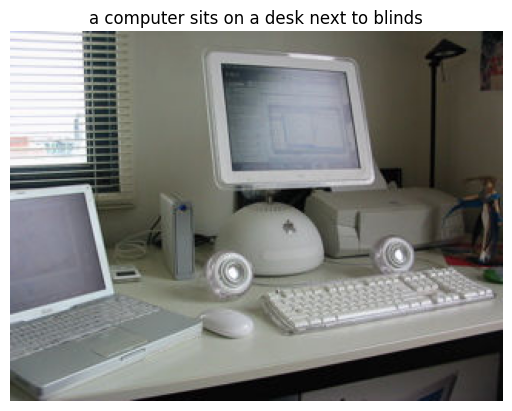


Average BLEU score across 1 image(s): 59.72%
Similarity: 0.7409


In [12]:
# In kết quả (dùng cho Dữ liệu thi cuối kỳ)
# Sinh viên không được tạo thêm cells mới
# Tải ảnh test và chú thích đặt ra
from sentence_transformers import SentenceTransformer, util

custom_image_paths = [
    "/content/drive/MyDrive/Flickr8k/000000001503.jpg",
]

custom_captions_dict = {
    "000000001503.jpg": "A computer desk with several pieces of computer equipment",
}

generate_and_plot_captions_with_bleu_from_custom_images(
    model=model,
    processor=processor,
    image_paths=custom_image_paths,
    captions_dict=custom_captions_dict,
    device=device,
    num_images=1  # Hoặc thay đổi theo số lượng ảnh bạn muốn kiểm tra
)

s1 = "a computer desk with several pieces of computer equipment"
s2 = "a computer sits on a desk in an office"

def eval_caption(sentence1, sentence2):
    model = SentenceTransformer('sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2')
    # Encode sentences
    embeddings = model.encode([sentence1, sentence2], convert_to_tensor=True)
    # Compute cosine similarity
    similarity = util.pytorch_cos_sim(embeddings[0], embeddings[1])
    print(f"Similarity: {similarity.item():.4f}")

eval_caption(s1, s2)

# Câu hỏi

Mô hình gồm bao nhiêu khối chức năng (functional blocks)? 4

Khối 1:
* Nhiệm vụ: ví dụ: chuyển ảnh đầu vào thành vector đặc trưng có nghĩa (mục tiêu của khối chức năng tương ứng)
* Vị trí code: ví dụ: cell 10, dòng 30-60 (cell code, dòng code bắt đầu-dòng code kết thúc, tuân theo “line numbers” trên google colab)
* Input: ví dụ: ma trận ảnh (thông tin đầu vào của khối)
* Output: ví dụ: vector đặc trưng (thông tin đầu ra của khối)

Khối 2:
* Nhiệm vụ:
* Vị trí code:
* Input:
* Output:

Khối 3:
* Nhiệm vụ:
* Vị trí code:
* Input:
* Output:

Khối 4:
* Nhiệm vụ:
* Vị trí code:
* Input:
* Output:

…
